c:\python\miniconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
c:\python\miniconda\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


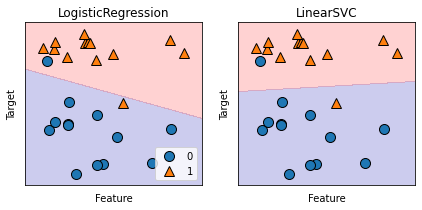

In [8]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(7, 3))

for model, ax in zip([LogisticRegression(), LinearSVC()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.2)
    mglearn.discrete_scatter(X[: ,0], X[: ,1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend()

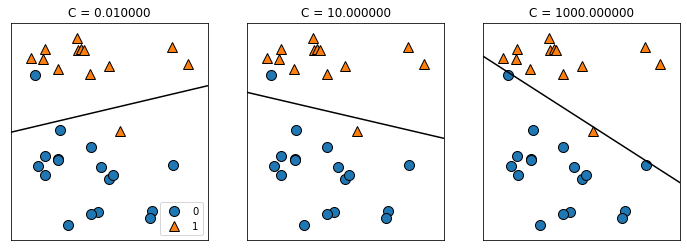

In [2]:
import mglearn
mglearn.plots.plot_linear_svc_regularization()

c:\python\miniconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy with C = 0.001 
0.96
Test accuracy with C = 0.001
0.94



c:\python\miniconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\python\miniconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check

Training accuracy with C = 1.000 
0.95
Test accuracy with C = 1.000
0.94

Training accuracy with C = 100.000 
0.95
Test accuracy with C = 100.000
0.95



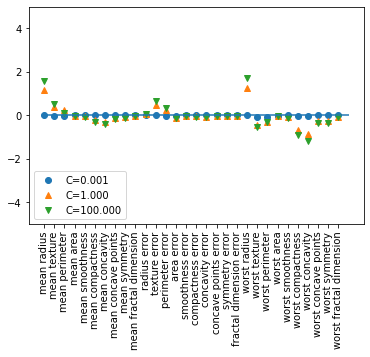

In [3]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# logreg = LogisticRegression().fit(X_train, y_train)
# logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
# logreg001 = LogisticRegression(C=0.001).fit(X_train, y_train)

# print("logreg c=1")
# print("Training accuracy{:.3f}".format(logreg.score(X_train, y_train)))
# print("Test accuracy{:.3f}\n".format(logreg.score(X_test, y_test)))

# print("logreg100 c=100")
# print("Training accuracy{:.3f}".format(logreg100.score(X_train, y_train)))
# print("Test accuracy{:.3f}\n".format(logreg100.score(X_test, y_test)))

# print("logreg001 c=0.001")
# print("Training accuracy{:.3f}".format(logreg001.score(X_train, y_train)))
# print("Test accuracy{:.3f}".format(logreg001.score(X_test, y_test)))

# plt.plot(logreg.coef_.T, 'o', label="C=1")
# plt.plot(logreg100.coef_.T, '^', label="C=100")
# plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
# plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
# plt.hlines(0, 0, cancer.data.shape[1])
# plt.ylim(-5, 5)
# plt.xlabel("Coefficient index")
# plt.ylabel("Coefficient magnitude")
# plt.legend()

for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    logreg_l1 = LogisticRegression(C=C).fit(X_train, y_train)
    print("Training accuracy with C = {:.3f} \n{:.2f}".format(C, logreg_l1.score(X_train, y_train)))
    print("Test accuracy with C = {:.3f}\n{:.2f}\n".format(C, logreg_l1.score(X_test, y_test)))
    plt.plot(logreg_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.legend(loc=3)

Coefficient shape(3, 2)

Intercept(3,)



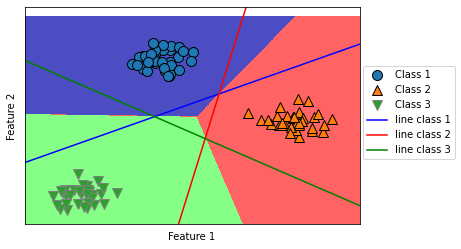

In [22]:
import matplotlib.pyplot as plt
import mglearn
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)

mglearn.discrete_scatter(X[: ,0], X[: ,1], y)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend(["Class 0", "Class 1", "Class 2"])

lr = LinearSVC().fit(X, y)
print("Coefficient shape{}\n".format(lr.coef_.shape))
print("Intercept{}\n".format(lr.intercept_.shape))

mglearn.plots.plot_2d_classification(lr, X, fill=True, alpha=0.7)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(lr.coef_, lr.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line*coef[0] + intercept)/coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(["Class 1", "Class 2", "Class 3", "line class 1", "line class 2", "line class 3"], loc=(1.01, 0.3))